# Analyze mouse sizes across age, use to better parameterize SNN scaling augmentations

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aging.plotting import figure, format_plots

In [14]:
format_plots()

In [2]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_09/ontogeny_males_syllable_df_v00.parquet')
df2 = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_09/dana_ontogeny_males_syllable_df_v00.parquet')

In [6]:
df = pd.concat([df, df2])

In [5]:
df.columns

Index(['experiment', 'file', 'syllables', 'date', 'uuid', 'age', 'true_depth',
       'session_name', 'subject_name', 'timestamps', 'raw_timestamps',
       'area_mm', 'area_px', 'centroid_x_mm', 'centroid_x_px', 'centroid_y_mm',
       'centroid_y_px', 'height_ave_mm', 'length_mm', 'length_px',
       'velocity_2d_mm', 'velocity_2d_px', 'velocity_3d_mm', 'velocity_3d_px',
       'width_mm', 'width_px', 'angle', 'velocity_theta', 'recon_width',
       'recon_length', 'recon_height', 'recon_area', 'onsets'],
      dtype='object')

In [7]:
widths = df.groupby(['age', 'uuid'])['width_px'].agg(['mean', 'min', 'max', 'median'])
lengths = df.groupby(['age', 'uuid'])['length_px'].agg(['mean', 'min', 'max', 'median'])
area = df.groupby(['age', 'uuid'])['area_px'].agg(['mean', 'min', 'max', 'median'])

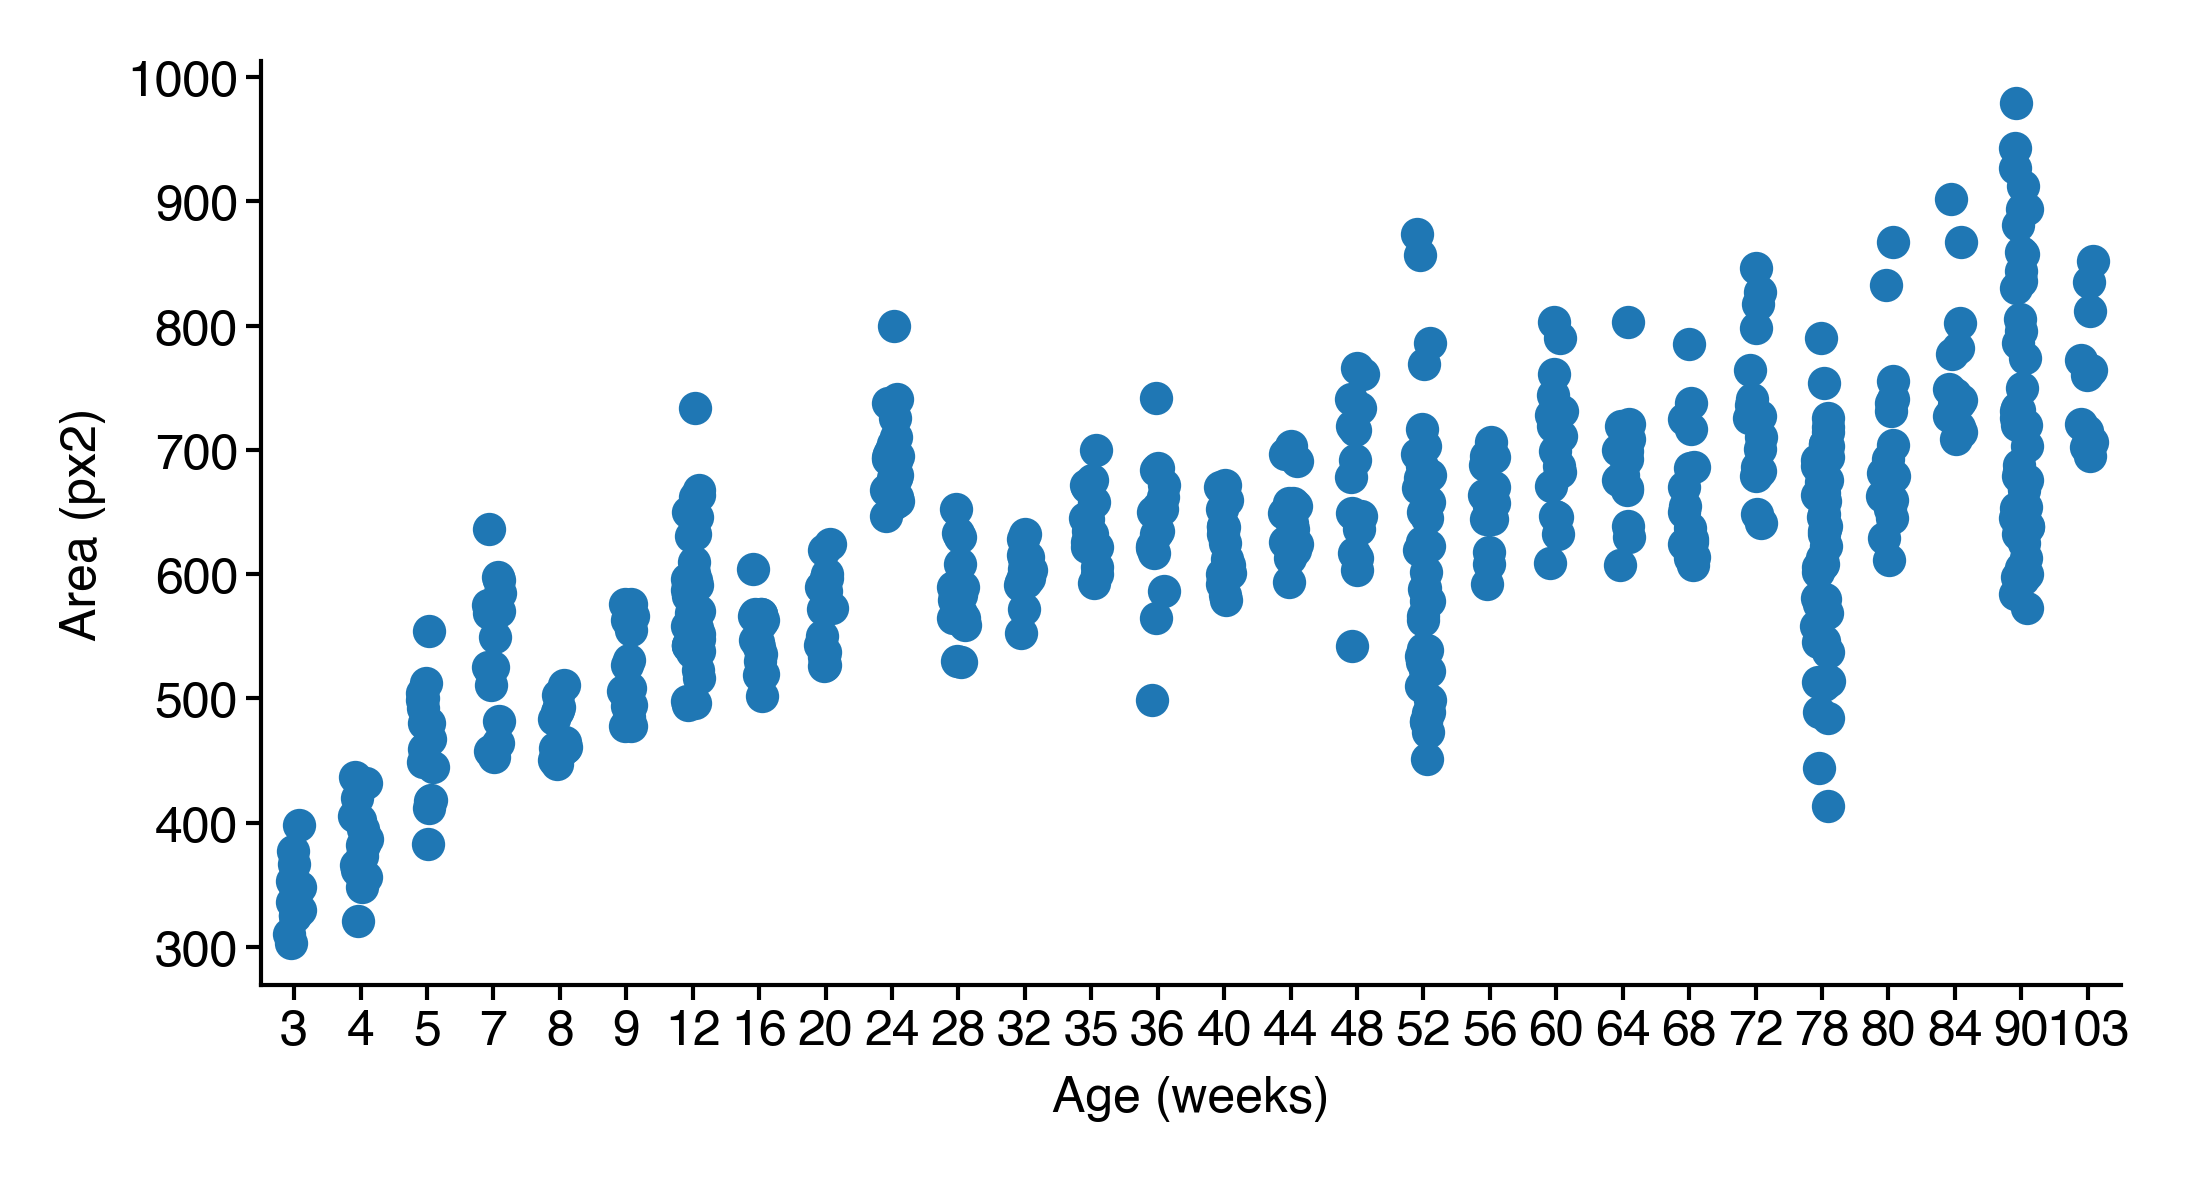

In [36]:
fig = figure(4, 2)
ax = sns.stripplot(data=area.reset_index(), x='age', y='median', size=4)
ax.set(ylabel='Area (px2)', xlabel='Age (weeks)')
sns.despine()

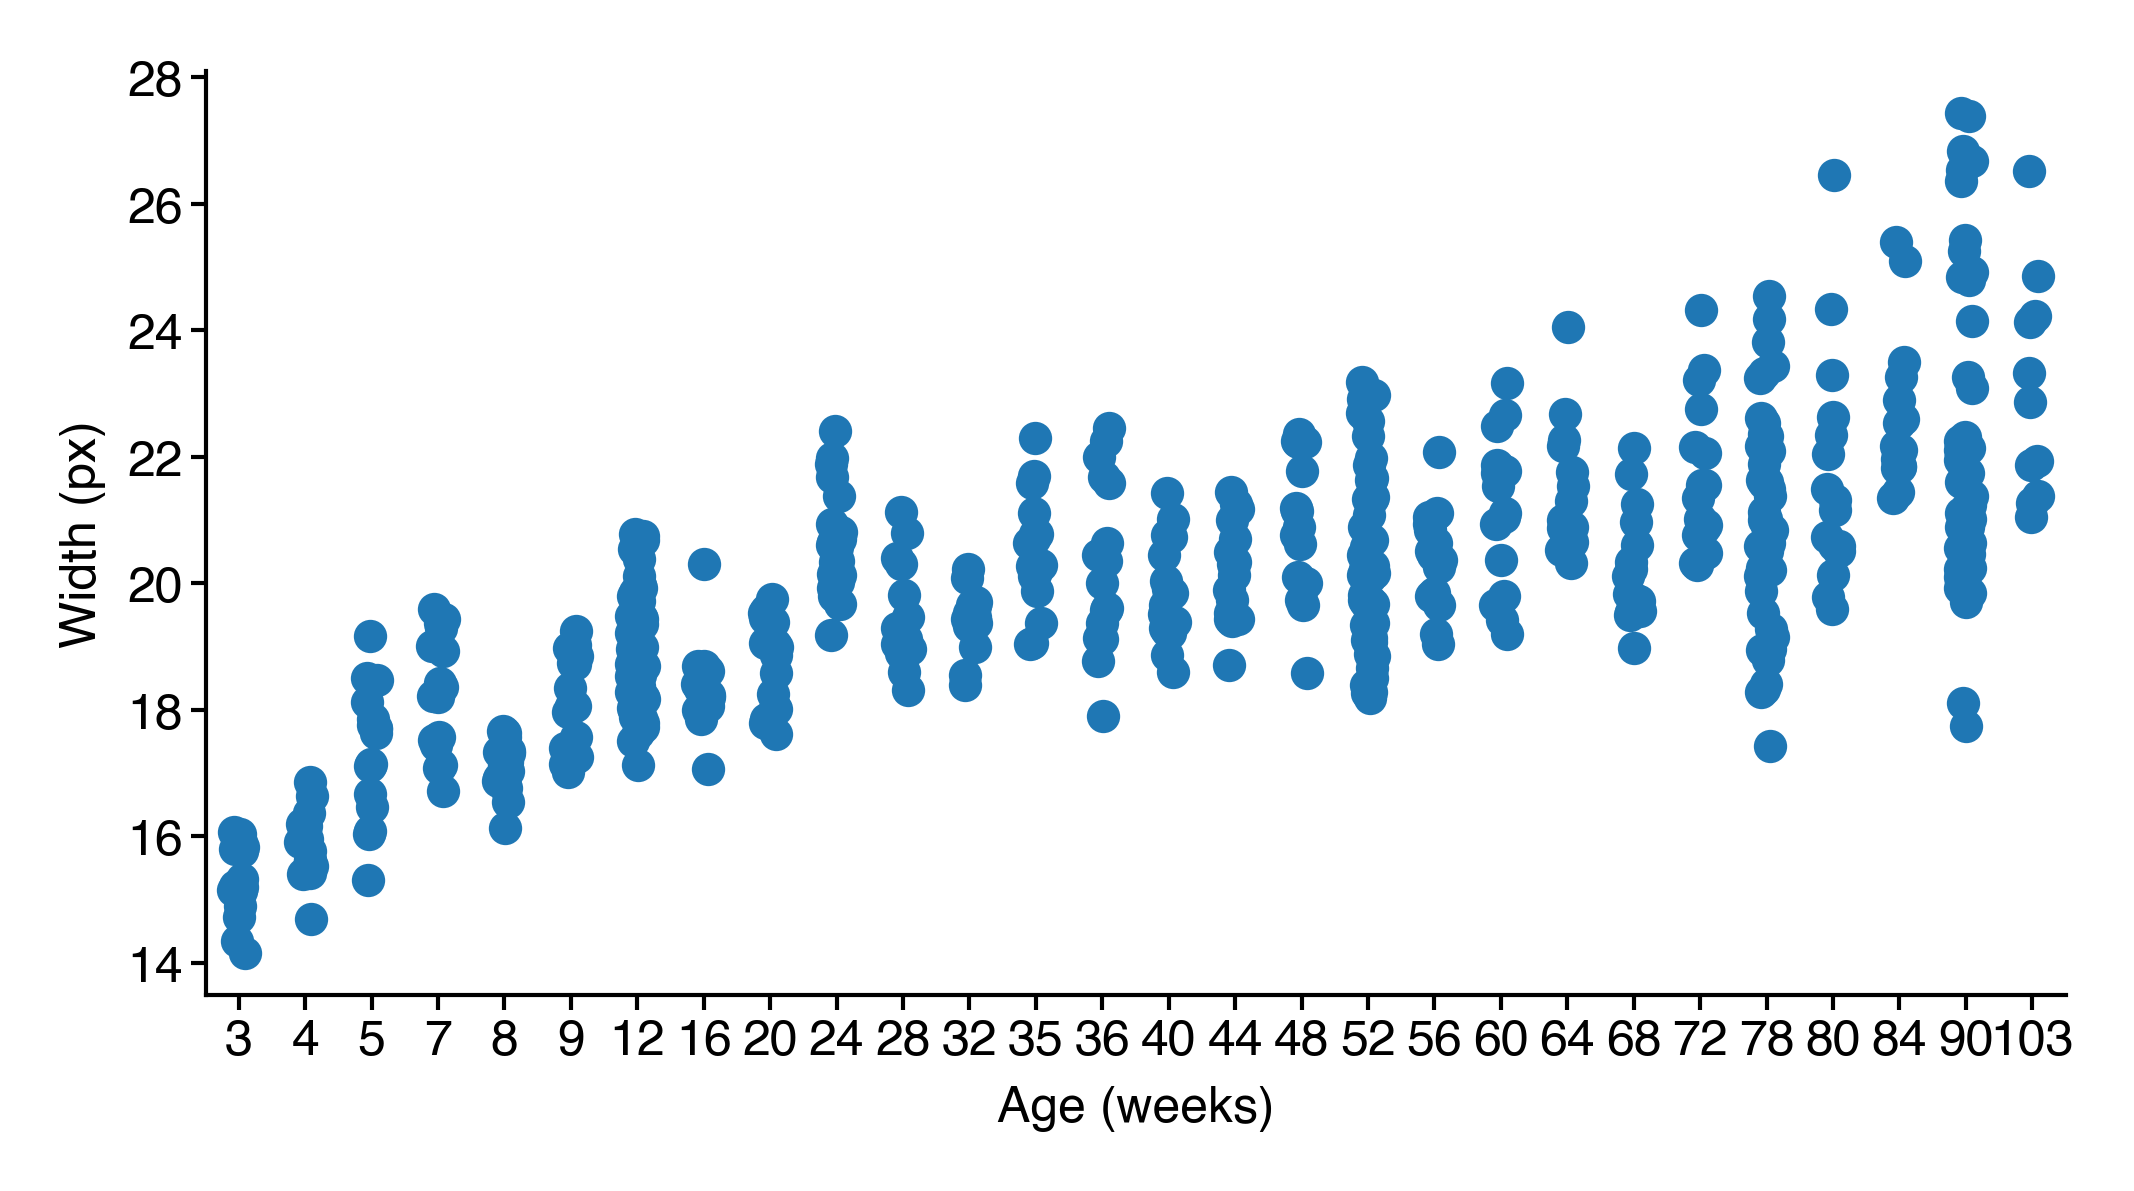

In [18]:
fig = figure(4, 2)
ax = sns.stripplot(data=widths.reset_index(), x='age', y='median', size=4)
ax.set(ylabel='Width (px)', xlabel='Age (weeks)')
sns.despine()

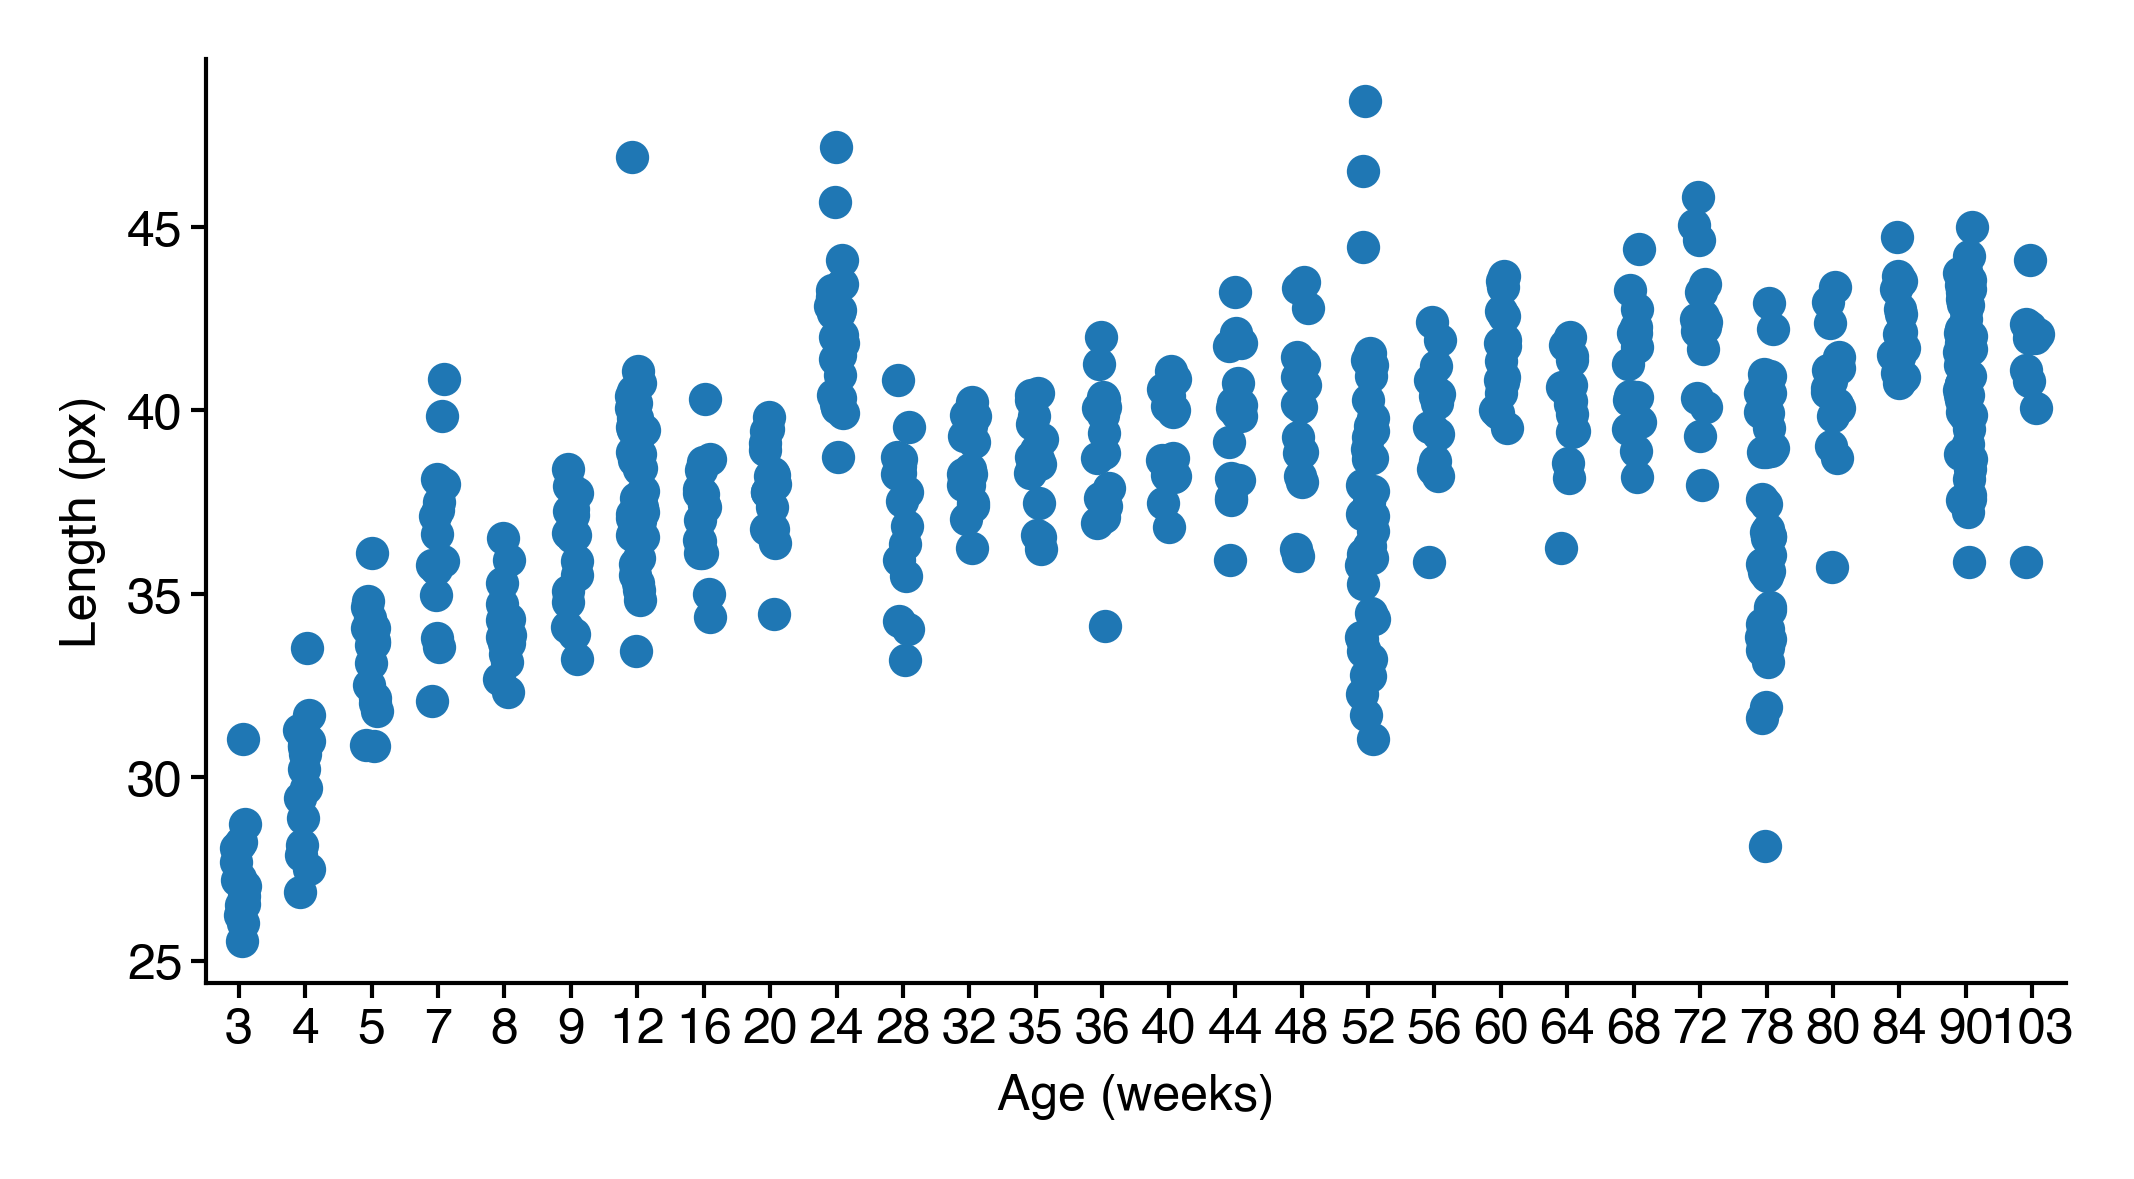

In [35]:
fig = figure(4, 2)
ax = sns.stripplot(data=lengths.reset_index(), x='age', y='median', size=4)
ax.set(ylabel='Length (px)', xlabel='Age (weeks)')
sns.despine()

In [19]:
template_sizes = widths.loc[12, 'median'].agg(['mean', 'median', 'min', 'max'])
median_width_ranges = widths['median'] / template_sizes['median']
min_width_ranges = widths['median'] / template_sizes['min']
max_width_ranges = widths['median'] / template_sizes['max']

In [28]:
max_width_ranges.agg(['min', 'max'])

min    0.681186
max    1.320241
Name: median, dtype: float64

In [29]:
min_width_ranges.agg(['min', 'max'])

min    0.826224
max    1.601346
Name: median, dtype: float64

In [30]:
median_width_ranges.agg(['min', 'max'])

min    0.755843
max    1.464937
Name: median, dtype: float64

In [31]:
template_sizes = area.loc[12, 'median'].agg(['mean', 'median', 'min', 'max'])
median_area_ranges = area['median'] / template_sizes['median']
min_area_ranges = area['median'] / template_sizes['min']
max_area_ranges = area['median'] / template_sizes['max']

In [32]:
min_area_ranges.agg(['min', 'max'])

min    0.612121
max    1.977778
Name: median, dtype: float64

In [33]:
max_area_ranges.agg(['min', 'max'])

min    0.412807
max    1.333787
Name: median, dtype: float64

In [34]:
median_area_ranges.agg(['min', 'max'])

min    0.531579
max    1.717544
Name: median, dtype: float64

In [41]:
template_sizes = lengths.loc[12, 'median'].agg(['mean', 'median', 'min', 'max'])
median_lengths_ranges = lengths['median'] / template_sizes['median']
min_lengths_ranges = lengths['median'] / template_sizes['min']
max_lengths_ranges = lengths['median'] / template_sizes['max']

In [42]:
min_lengths_ranges.agg(['min', 'max'])

min    0.763583
max    1.448327
Name: median, dtype: float64

In [43]:
max_lengths_ranges.agg(['min', 'max'])

min    0.544180
max    1.032174
Name: median, dtype: float64

In [44]:
median_lengths_ranges.agg(['min', 'max'])

min    0.678815
max    1.287544
Name: median, dtype: float64